In [35]:
#import library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from statsmodels.formula.api import ols


In [36]:
#load and read xpt files
demo = pd.read_sas('/content/xptfiles/demographics.xpt')
bp = pd.read_sas('/content/xptfiles/bloodpressure.xpt')
hepb = pd.read_sas('/content/xptfiles/hepb.xpt')
kidney = pd.read_sas('/content/xptfiles/kidney.xpt')
activity = pd.read_sas('/content/xptfiles/sedentaryactivity.xpt')
weight = pd.read_sas('/content/xptfiles/selfweight.xpt')
vitd = pd.read_sas('/content/xptfiles/vitamind.xpt')

In [37]:
#inspect/preview data

demo.shape


(11933, 27)

In [38]:
# Merge columns that I want into one dataframe

df = (
    demo[['SEQN', "DMDMARTZ", "DMDEDUC2", 'RIDAGEYR']]
    .merge
    (bp[['SEQN','BPXOSY3', 'BPXODI3']], on ="SEQN", how= "left")
    .merge
    (hepb[['SEQN', 'LBXHBS']], on ='SEQN', how = 'left')
    .merge
    (kidney[['SEQN', 'KIQ022']], on = 'SEQN', how = 'left')
    .merge
    (activity[['SEQN', 'PAD680']], on = 'SEQN', how = 'left')
    .merge
    (weight[['SEQN', 'WHD020']], on = 'SEQN', how = 'left')
    .merge
    (vitd[['SEQN', 'LBDVD2LC']], on = 'SEQN', how = 'left')
    )

In [39]:
## inspect data
df.head(40)


,SEQN,DMDMARTZ,DMDEDUC2,RIDAGEYR,BPXOSY3,BPXODI3,LBXHBS,KIQ022,PAD680,WHD020,LBDVD2LC
0,130378.0,1.0,5.0,43.0,132.0,94.0,2.0,2.0,360.0,190.0,1.000000e+00
1,130379.0,1.0,5.0,66.0,113.0,76.0,2.0,2.0,480.0,220.0,1.000000e+00
2,130380.0,1.0,3.0,44.0,104.0,76.0,2.0,2.0,240.0,150.0,1.000000e+00
3,130381.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
5,130383.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,130384.0,3.0,2.0,43.0,NaN,NaN,NaN,2.0,60.0,204.0,NaN
7,130385.0,1.0,3.0,65.0,NaN,NaN,NaN,2.0,180.0,240.0,NaN
8,130386.0,1.0,4.0,34.0,115.0,75.0,1.0,2.0,180.0,200.0,1.000000e+00
9,130387.0,3.0,5.0,68.0,145.0,78.0,2.0,2.0,1200.0,215.0,1.000000e+00


In [40]:
df.shape

(11933, 11)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   DMDMARTZ  7792 non-null   float64
 2   DMDEDUC2  7794 non-null   float64
 3   RIDAGEYR  11933 non-null  float64
 4   BPXOSY3   7480 non-null   float64
 5   BPXODI3   7480 non-null   float64
 6   LBXHBS    7366 non-null   float64
 7   KIQ022    7807 non-null   float64
 8   PAD680    8138 non-null   float64
 9   WHD020    8486 non-null   float64
 10  LBDVD2LC  7307 non-null   float64
dtypes: float64(11)
memory usage: 1.0 MB


In [42]:
# clean up data

## recode martial
def recode_marital(x):
    # 1 = Married
    # 2-5 = not married, 7= refused, 9= unknown
  if x in [1]:
    return "Married"
  elif x in [2,3,4,5,6]:
    return "Not married"
  else:
    return np.nan


# recode education
def recode_education(x):
  # 5 = college graduate or higher
  #1-4 = less than bachelors
  if x == 5:
    return "Bachelors or higher"
  elif x in [1,2,3,4]:
    return "Less than bachelors"
  else:
    return np.nan

# clean continious variables by removing placeholders (7777,9999)
PLACEHOLDERS = [7777, 9999]
df['RIDAGEYR'] = df['RIDAGEYR'].replace(PLACEHOLDERS, np.nan)
df['BPXOSY3'] = df['BPXOSY3'].replace(PLACEHOLDERS, np.nan)
df['BPXODI3'] = df['BPXODI3'].replace(PLACEHOLDERS, np.nan)
df['PAD680'] = df['PAD680'].replace(PLACEHOLDERS, np.nan)
df['WHD020'] = df['WHD020'].replace(PLACEHOLDERS, np.nan)

# clean categorical variable
df['LBXHBS'] = df['LBXHBS'].replace({
    1:"Negative",
    2:"Positive",
    7:np.nan,
    9:np.nan
})

df['KIQ022'] = df['KIQ022'].replace({
    1:"Weak/Failing",
    2:"Never been told",
    7:np.nan,
    9:np.nan
})

# apply recoding to dataframe
df['DMDMARTZ'] = df['DMDMARTZ'].apply(recode_marital)
df['DMDEDUC2'] = df['DMDEDUC2'].apply(recode_education)

In [43]:
df['DMDMARTZ'].value_counts(dropna=False)

,count
DMDMARTZ,
NaN,4150
Married,4136
Not married,3647


In [44]:
df['DMDEDUC2'].value_counts(dropna=False)

,count
DMDEDUC2,
Less than bachelors,5158
NaN,4150
Bachelors or higher,2625


In [45]:
df['LBXHBS'].value_counts(dropna=False)

,count
LBXHBS,
Positive,5324
NaN,4567
Negative,2042


In [46]:
df['KIQ022'].value_counts(dropna=False)

,count
KIQ022,
Never been told,7473
NaN,4139
Weak/Failing,321


In [47]:
df['LBDVD2LC'].value_counts(dropna=False)

,count
LBDVD2LC,
1.000000e+00,5860
NaN,4626
5.397605e-79,1447


### Question 1: "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"

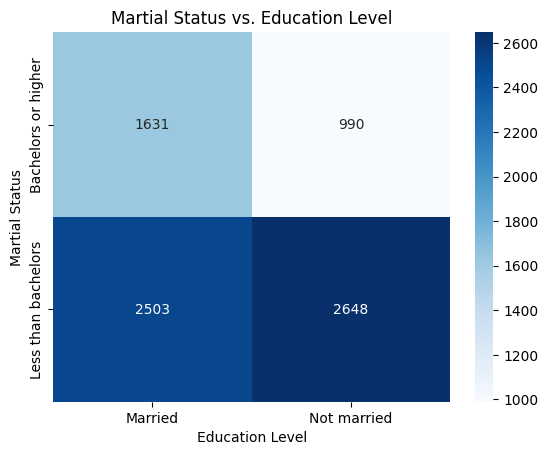

In [48]:
# we have to user chi-square to compare 2 categories
chi_df = df[['DMDMARTZ','DMDEDUC2']].dropna()
q1table =pd.crosstab(chi_df['DMDEDUC2'], chi_df['DMDMARTZ'])

sns.heatmap(q1table, annot=True, fmt="d", cmap="Blues")

plt.title("Martial Status vs. Education Level")
plt.xlabel("Education Level")
plt.ylabel("Martial Status")
plt.show()

In [49]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(q1table)

print("p-value:", p)

p-value: 6.213197986632679e-30


##### The p-value is less than 0.05, indicating a statistically significant association between marital status and education level. Married individuals are more likely to have a bachelor’s degree or higher, while those who are not married are more likely to have less than a bachelor’s degree.

### Question 2: Question 2: "Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?"

In [50]:
# use t-test
q2 = df[['DMDMARTZ', 'PAD680']].dropna()
q2

,DMDMARTZ,PAD680
0,Married,360.0
1,Married,480.0
2,Married,240.0
6,Not married,60.0
7,Married,180.0
...,...,...
11927,Not married,480.0
11929,Not married,480.0
11930,Married,600.0
11931,Not married,240.0


In [51]:
#split into 2 groups
married = q2[q2['DMDMARTZ'] == 'Married']['PAD680']
not_married = q2[q2['DMDMARTZ'] == 'Not married']['PAD680']

# independent t-test
t_stat, p_val = ttest_ind(married, not_married)

print("T-statistic:", t_stat)
print('P-value', p_val)
print("Married mean:", married.mean())
print("Not married mean:", not_married.mean())

T-statistic: -3.8699896847970154
P-value 0.00010973792037934772
Married mean: 353.28714076960546
Not married mean: 371.95753538717736


 A p-value less than 0.05 indicates a statistically significant difference. Individuals who are married have lower sedentary behavior time compared to those who are not married.

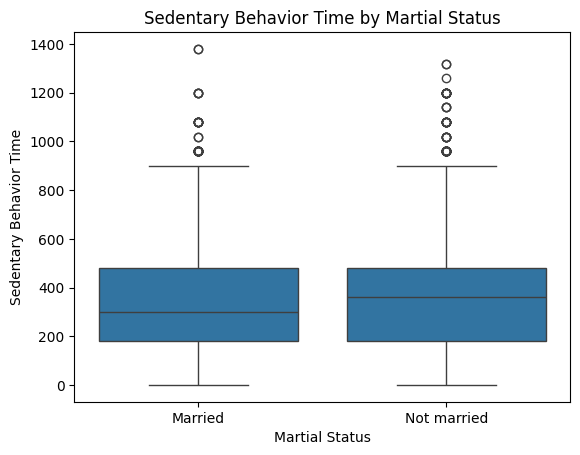

In [52]:
sns.boxplot(data=q2, x="DMDMARTZ", y = 'PAD680')
plt.title('Sedentary Behavior Time by Martial Status')
plt.xlabel("Martial Status")
plt.ylabel("Sedentary Behavior Time")
plt.show()

### Question 3: "How do age and marital status affect systolic blood pressure?"



In [53]:
q3 = df[['BPXOSY3', 'RIDAGEYR', 'DMDMARTZ']].dropna()
q3

,BPXOSY3,RIDAGEYR,DMDMARTZ
0,132.0,43.0,Married
1,113.0,66.0,Married
2,104.0,44.0,Married
8,115.0,34.0,Married
9,145.0,68.0,Not married
...,...,...,...
11927,144.0,76.0,Not married
11929,131.0,49.0,Not married
11930,112.0,50.0,Married
11931,128.0,40.0,Not married


In [54]:
## use linear regression to find how age and martial status affects systolic blood pressure
model = smf.ols('BPXOSY3 ~ RIDAGEYR + C(DMDMARTZ)', data=q3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                BPXOSY3   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     453.3
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          1.00e-183
Time:                        18:18:41   Log-Likelihood:                -24856.
No. Observations:                5838   AIC:                         4.972e+04
Df Residuals:                    5835   BIC:                         4.974e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

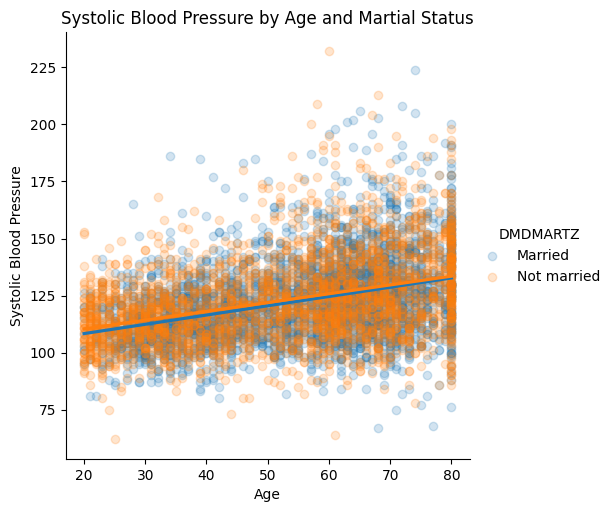

In [55]:
sns.lmplot(data=q3, x ="RIDAGEYR", y='BPXOSY3', hue='DMDMARTZ', scatter_kws={'alpha':0.2} )

plt.title('Systolic Blood Pressure by Age and Martial Status')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.show()

##### As the population ages, systolic blood pressure increases. Being married or not married does not appear to play a major role in systolic blood pressure. There may be a slight increase in systolic pressure among individuals who are not married compared to those who are married.

### Question 4: Is there a correlation between self-reported weight and minutes of sedentary behavior?

In [56]:
### we need to use correlation because these 2 columns are continious and no categorical.
q4 = df[['WHD020', 'PAD680']].dropna()
r, p = pearsonr(q4['WHD020'], q4['PAD680'])
print("Correlation (r):", r )
print("p-value:", p)

Correlation (r): 0.1559714584645022
p-value: 1.6988498386823033e-44


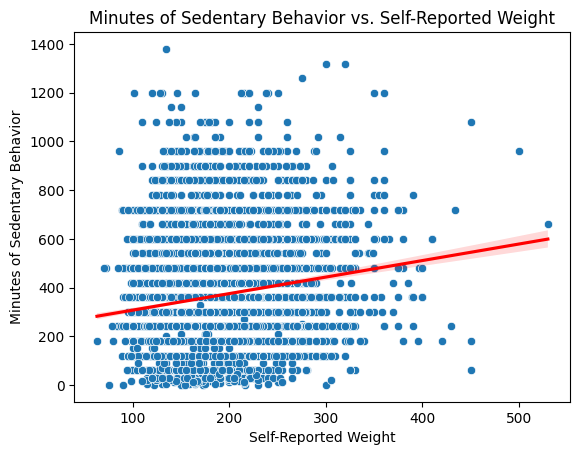

In [57]:
sns.scatterplot(data=q4, x= "WHD020", y= "PAD680")
sns.regplot(data=q4, x= 'WHD020', y= 'PAD680', scatter=False, color='red')

plt.title('Minutes of Sedentary Behavior vs. Self-Reported Weight')
plt.xlabel('Self-Reported Weight')
plt.ylabel('Minutes of Sedentary Behavior')
plt.show()

##### A Pearson correlation was conducted to examine the relationship between self-reported weight and sedentary behavior. Results show a weak positive correlation between the two columns. The correlation strength (r = 0.15597) indicates a weak positive relationship. The p-value shows that the correlation is unlikely to be due to random chance.

### Question 5 (Creative Analysis): Is there a difference in mean sedentary behavior time across vitamin D interpretation levels and weak/failing kidney status?


###### I chose this question because I want to figure out if weak kidneys would have an effect on physical activity. I am assuming vitamin D would also be higher on those who have more physical activity.

In [58]:
df['LBDVD2LC'] = df['LBDVD2LC'].round(0).replace({
    0: "Normal",
    1: "Low"
})

# Kidney recode
df['KIQ022'] = df['KIQ022'].replace({
    1:"Weak/Failing",
    2:"Never been told",
    7:np.nan,
    9:np.nan
})

# Build analysis subset
q5 = df[['PAD680','LBDVD2LC','KIQ022']].dropna()

# Check groups
print(q5['LBDVD2LC'].value_counts())
print(q5['KIQ022'].value_counts())

LBDVD2LC
Low       4299
Normal    1248
Name: count, dtype: int64
KIQ022
Never been told    5341
Weak/Failing        206
Name: count, dtype: int64


In [59]:
model = ols('PAD680 ~ C(LBDVD2LC) + C(KIQ022) + C(LBDVD2LC):C(KIQ022)', data=q5).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                             sum_sq      df         F    PR(>F)
C(LBDVD2LC)            1.406932e+05     1.0  3.238234  0.071992
C(KIQ022)              7.987817e+04     1.0  1.838498  0.175182
C(LBDVD2LC):C(KIQ022)  1.755563e+04     1.0  0.404065  0.525024
Residual               2.408296e+08  5543.0       NaN       NaN


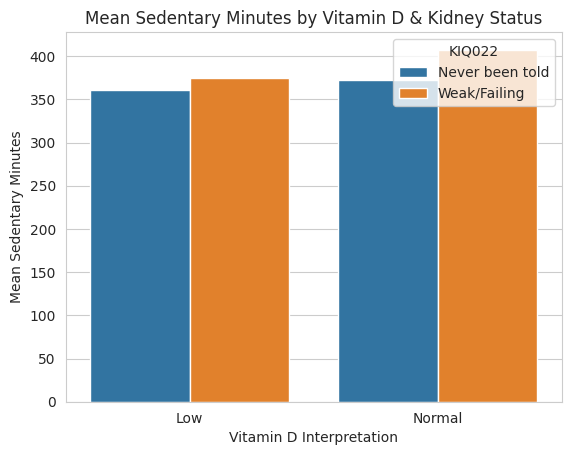

In [60]:

sns.set_style("whitegrid")

sns.barplot(
    data=q5,
    x="LBDVD2LC",
    y="PAD680",
    hue="KIQ022",
    errorbar=None
)

plt.title("Mean Sedentary Minutes by Vitamin D & Kidney Status")
plt.xlabel("Vitamin D Interpretation")
plt.ylabel("Mean Sedentary Minutes")
plt.show()

##### The bar plot shows that mean sedentary minutes are similar across both vitamin D interpretation levels and kidney status groups, with only small differences between the bars.
##### The p-values (PR(>F)) were all above 0.05, indicating that the results were not significant.
##### The visual pattern shows no significant main effects or interaction between vitamin D status and weak/failing kidneys on sedentary behavior.
##### The chart shows that people with weak/failing kidneys had slightly more sedentary minutes than those who have never been told. People with low vitamin D also had slightly fewer mean sedentary minutes compared to those with normal vitamin D results. Although it appears this way visually, the differences are minimal.